# Layers in CNN

- Input, Convolution+ReLU, Pooling, Fully Connected Layers

- Input Layer:raw input of image with height * width * depth
- Convolution Layer: 
  - compute the output volume, dot product between filter and image
  - Input: image matrix (N), filter (kernel K)->output(N-K-1)
-  ReLU (Rectified Linear Unit): Max(0,x),computionally less expensive than other activation function
- Pooling Layer: reduce the size of convolved features, decrease computational power 
  - Types:Max/Average Pooling
- Fully Connected Layers: artificial NN

# Spam Detection with CNN

# 1) Data Preprocessing

In [27]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [29]:
df=pd.read_csv('/content/25153370-spam.csv',encoding='ISO-8859-1')

In [30]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
#drop garbage columns,we only keep v1 and v2 columns
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [32]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
#rename columns
df.columns=['labels','data']

In [34]:
#create binary labels (0,1)-->create a new column as b_labels
df['b_labels']=df['labels'].map({'ham':0,'spam':1}) #use label encoder with the dictionary
y=df['b_labels'].values

In [35]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(df['data'],y,test_size=0.33)

Sequencing:
- Taking a string of words and converting those words into a *sequence of numbers*.
- use **text_to_sequences()** in coding

In [37]:
#Convert sentence to sequences
max_vocab_size=20000
#Define a tokenizer object
tokenizer=Tokenizer(num_words=max_vocab_size)
#map our tokenizer objects to our sentences we created
tokenizer.fit_on_texts(x_train)
#handle the words appear in our training and testing datasets from text->sequence
sequences_train=tokenizer.texts_to_sequences(x_train)
sequences_test=tokenizer.texts_to_sequences(x_test)

In [40]:
 sequences_train[0]

[168,
 356,
 1262,
 472,
 370,
 12,
 5,
 344,
 15,
 223,
 246,
 113,
 128,
 224,
 615,
 2268,
 85,
 357,
 89,
 3,
 103]

In [42]:
len(sequences_train[0])

21

In [43]:
len(sequences_train[1])

7

In [38]:
#define our word index and print it out
word2index=tokenizer.word_index
V=len(word2index)
print('Total number of unique tokens are:%s' % V)

Total number of unique tokens are:7239


Padding:
- let Netural Network deal with different lengths sentences, NN only treat fixed input
- We use **pad_sequences()** method

In [44]:
#Pad train sentences to get N*T matrix, N: # of samples; T:# of time steps
data_train=pad_sequences(sequences_train)
print('Shape of data train tensor:',data_train.shape)

Shape of data train tensor: (3733, 189)


In [47]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [48]:
len(data_train[0])

189

In [49]:
len(data_train[1])

189

The **length** of first two records **are the same** after we check them out.

In [45]:
#set the value of T to get sequence length, just the same as the first two checking results
T=data_train.shape[1]

In [46]:
print(T)

189


In [50]:
#Pad test sentences
data_test=pad_sequences(sequences_test,maxlen=T)
#maxlen=T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Build the Model

In [51]:
#Choose the embedding dimensionality
D=20  #the hyperparameter, we choose any word vector size that we want

#Input layer,every single record has been represented to be the 189 record
i=Input(shape=(T,))

#Embedding layer, return sequences of word vectors, V is unique token
x= Embedding(V+1,D)(i) #it will return a N*T*D array, we want size of embedding to (V+1) *D, because first word index start from 1, not from 0

#First CNN Layer
x=Conv1D(32,3,activation='relu')(x) #we get 32 convolution features in the first CNN layer, each of feature having a total 3 values extracted seem like a maxpooling.
x=MaxPooling1D(3)(x) 

#Second CNN Layer
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

#Third CNN Layer
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)

#Dense Layer
x= Dense(1,activation='sigmoid')(x)

model=Model(i,x)

**Differences between Conv1D and Con2D**

https://keras.io/api/layers/convolution_layers/
- We can see that the 2D in Conv2D means each channel in the input and filter is 2 dimensional
- and 1D in Conv1D means each channel in the input and filter is 1 dimensional

In [52]:
#compile the model,we deal with binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

In [53]:
#train the model
r=model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test)) #5次迭代

Epoch 1/5
117/117 [==============================] - 4s 24ms/step - loss: 0.3857 - accuracy: 0.8561 - val_loss: 0.2709 - val_accuracy: 0.8717
Epoch 2/5
117/117 [==============================] - 3s 22ms/step - loss: 0.1321 - accuracy: 0.9416 - val_loss: 0.0686 - val_accuracy: 0.9799
Epoch 3/5
117/117 [==============================] - 3s 22ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0649 - val_accuracy: 0.9859
Epoch 4/5
117/117 [==============================] - 3s 23ms/step - loss: 0.0044 - accuracy: 0.9995 - val_loss: 0.0684 - val_accuracy: 0.9859
Epoch 5/5
117/117 [==============================] - 3s 22ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0598 - val_accuracy: 0.9848


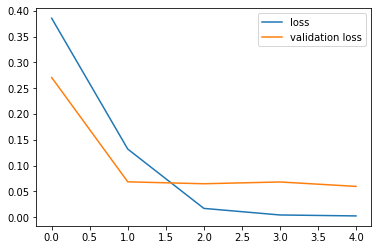

In [55]:
#Evaluation: loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

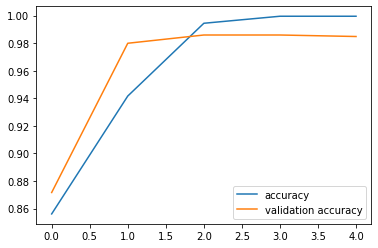

In [57]:
#Accuracy score
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()